# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Add your imports here
import numpy as np
import pandas as pd

In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
colors = pd.read_csv(LEGO_DATA_FOLDER + "/colors.csv.zip")
inventories = pd.read_csv(LEGO_DATA_FOLDER + "/inventories.csv.zip")
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_parts.csv.zip")
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_sets.csv.zip")
part_categories = pd.read_csv(LEGO_DATA_FOLDER + "/part_categories.csv.zip")
parts = pd.read_csv(LEGO_DATA_FOLDER + "/parts.csv.zip")
sets = pd.read_csv(LEGO_DATA_FOLDER + "/sets.csv.zip")
themes = pd.read_csv(LEGO_DATA_FOLDER + "/themes.csv.zip")
#themes = pd.read_csv(LEGO_DATA_FOLDER + "/themes.csv.zip", index_col = 0)

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

### Inconsistencies

#### Sets Time Range
Several inconsistencies exist including:
1. 70s and 80s are considered big values while in reality, they mean 1970's and 1980's. The inconsistency in how the year was inputed results in 80s being considered the max value of the range, which is obviously false since the biggest value is 2017.
2. Negative values of year
3. Typos. For example: 19955 instead of 1995

#### Average Quantity of Inventory Parts
Quantity values of infinity are included in the data set, making it impossible to calculate the average. 


In [5]:
inventory_parts = inventory_parts.replace(-np.inf, np.nan)
inventory_parts.quantity.mean()

3.836938260983857

In [6]:
sets.loc[sets.year == '70s', 'year'] = 1970
sets.loc[sets.year == '80s', 'year'] = 1980
sets['year'] = sets['year'].astype(np.int64).abs()
sets['year'] = sets['year'].astype(str).str[:4]
min, max = sets.year.min(), sets.year.max()
min, max

('1950', '2017')

__\* Briefly explain your approach for every query here \*__

#### Inventory Parts: 
Replaced infinity values to NaN values. Since a value of infinity cannot be used to calculate average, these values will be excluded when using NaN.

#### Sets Time Range:

1. Converted 70s to 1970
2. Converted 80s to 1980
3. Converted the column 'year' to have a data type with integer value and replaced each value with its absolute value
4. Only kept the first four digits of each year (hence 19955 --> 1995)

### A3. Querying phase
Answer the following queries using the functionality of Pandas:

1. List the ids of the inventories that belong to sets that contain cars. (Hint: Find a smart way to distinguish which sets contain cars based on the sets' name).
2. Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
3. Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
4. Create a scatter plot of the luminance* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

*The luminance of a color is a measure of brightness which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [7]:
# Write your code here
#Q1 Solution
car_df = sets[sets['name'].str.contains(" (c|C)ar(s|$|\s)", regex=True)]
car_df.id

/Users/judygong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


27           10002-1
50           10022-1
53           10025-1
142          10158-1
154          10170-1
182          10200-1
295          10552-1
325          10589-1
335          10600-1
376          10673-1
446          1076-22
505           1109-1
600          11908-1
705           1247-1
715           1253-1
717           1255-1
852           1361-1
858            137-2
918           1467-1
922            147-1
926           1477-1
933           1489-1
939           1496-1
957           1517-1
958           1518-1
1004           157-3
1038          1610-1
1043          1612-1
1097           167-1
1207          1825-1
            ...     
7623          7119-1
7800          7236-2
7807          7241-1
7898         7324-20
7945          7424-2
8011         75023-6
8227         7553-16
8228         7553-17
8229         7553-18
8316         75821-1
8485          7611-1
8486          7612-1
8565         7687-20
8566         7687-21
8807          7902-1
8842         7907-15
9279         

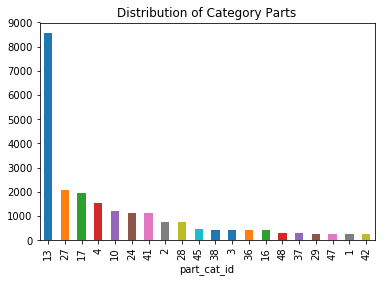

In [10]:
#Q2 Solution
parts_merge = pd.merge(parts, part_categories, how='outer', left_on=['part_cat_id'], right_on=['id'])
parts_grouped = parts_merge.groupby(['part_cat_id']).size().nlargest(20)
#parts_grouped = parts_grouped.sort_values(by='counts', ascending=False)[0:20]
parts_grouped.plot(x='part_cat_id', kind='bar', title='Distribution of Category Parts')

###### __\* Briefly explain your approach for every query here \*__

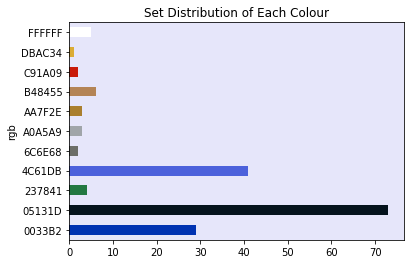

In [164]:
#Q3 Solution
result = pd.merge(inventory_parts, inventory_sets, how='inner', on='inventory_id')
#result2 = pd.merge(result, sets, how='inner', left_on=['set_id'], right_on=['id']) -- if we want set name
result1 = result.groupby(['set_id', 'color_id'], sort=True).size().reset_index(name='count')
result2 = result1.iloc[result1.groupby(['set_id']).apply(lambda x: x['count'].idxmax())]
result2
result3 = pd.merge(result2, colors, how='inner', left_on=['color_id'], right_on=['id'])
result4 = result3.groupby(['rgb']).size()
color_list = result4.index.tolist()
color_rgb = ['#' + color for color in color_list]
graph = result4.plot(x='rgb', kind='barh', color=color_rgb, title='Set Distribution of Each Colour')
graph.set_facecolor('#e6e6fa')

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [7]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [8]:
# Write your code here

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [9]:
# Write your code here

__\* Briefly explain your approach here \*__

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [10]:
# Write your code here

__\* Briefly explain your approach for every query here \*__